In [14]:
!pip install opencv-python pytesseract Pillow


In [15]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
image_path = "/content/drive/MyDrive/priyanshu.jpg"

In [17]:
image_path

'/content/drive/MyDrive/priyanshu.jpg'

In [18]:
import cv2
import pytesseract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Configure Tesseract path (No need for additional configuration in Colab)
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"


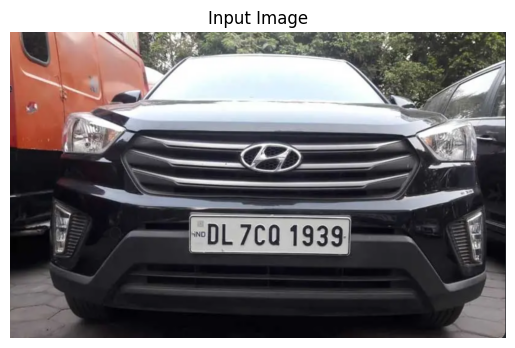

In [19]:
import cv2
import matplotlib.pyplot as plt

# Function to load and display the image
def load_image(image_path):
    image = cv2.imread(image_path)  # Read image
    if image is None:
        print("Error: Image not found. Check the file path.")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    plt.imshow(image)
    plt.axis("off")
    plt.title("Input Image")
    plt.show()
    return image

# Load the image
image = load_image(image_path)

if image is None:
    raise FileNotFoundError("Image could not be loaded. Verify the image path.")


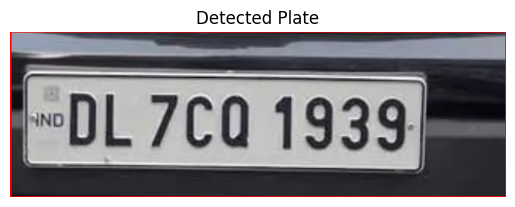

In [20]:
# Load Haar Cascade for number plate detection
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

# Function to detect the number plate
def detect_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in plates:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Draw rectangle around the plate
        plate = image[y:y + h, x:x + w]  # Crop the detected plate
        plt.imshow(plate)
        plt.axis("off")
        plt.title("Detected Plate")
        plt.show()
        return plate

    print("No plate detected.")
    return None

# Detect and display the number plate
plate = detect_plate(image)


In [22]:
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y libtesseract-dev


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,517 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,226 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restrict

In [23]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [24]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"


In [25]:
# Function to recognize characters from the number plate
def recognize_characters(plate):
    if plate is None:
        print("No plate to process.")
        return ""
    gray_plate = cv2.cvtColor(plate, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    _, thresh_plate = cv2.threshold(gray_plate, 128, 255, cv2.THRESH_BINARY)  # Apply thresholding
    text = pytesseract.image_to_string(thresh_plate, config="--psm 7")  # Use Tesseract OCR
    return text.strip()

# Recognize text from the detected number plate
if plate is not None:
    recognized_text = recognize_characters(plate)
    print(f"Recognized Number Plate: {recognized_text}")
else:
    print("No plate detected to recognize.")


Recognized Number Plate: DL 7CO 1939)
